# Análise de Regressão Linear: Taxa Selic vs Venda Total de Imóveis na RMR

### Objetivo
#### Este notebook tem como objetivo realizar uma análise de regressão linear simples para investigar a relação entre a Taxa Selic anualizada e a venda total de imóveis residenciais na Região Metropolitana do Recife (RMR). A análise busca validar a hipótese de que variações na Taxa Selic influenciam negativamente o mercado imobiliário, conforme postulado pela teoria econômica.

### Intervalo Temporal dos Dados
##### Os dados utilizados neste estudo são compostos por pontos mensais para ambas as séries:
- Venda Total de imóveis residenciais na RMR
- Taxa Selic anualizada

###### Os dados sobre a venda total de imóveis residenciais na RMR foram retirados dos relatórios do Índice IVV elaborado pela FIEPE.
###### Os dados da Taxa Selic anualizada foram retirados do Banco Central do Brasil.




In [43]:
# Importando as bibliotecas necessárias e carregando a base de dados
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

file_path = r"C:\Users\felipe.santos\Documents\Estudo\Estatística\Demanda por Imóveis\Regressão Selic.csv"
df = pd.read_csv(file_path, sep=';', decimal=',')

In [44]:
# Avaliando se há valores nulos, os tipos de dados das colunas e as primeiras linhas do dataset para garantir que a importação foi feita corretamente

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Data                   138 non-null    object 
 1   Venda Total            138 non-null    float64
 2   Taxa Selic Anualizada  138 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.8+ KB


,Data,Venda Total,Taxa Selic Anualizada
0,01/09/2012,702.0,0.0739
1,01/10/2012,552.0,0.0739
2,01/11/2012,786.0,0.0714
3,01/12/2012,803.0,0.0714
4,01/01/2013,701.0,0.0729


In [45]:
# Confirmando a quantidade de valores nulos por coluna do dataset
df.isnull().sum()

Data                     19
Venda Total              19
Taxa Selic Anualizada    19
dtype: int64

In [46]:
# Garantindo que os valores nulos são de fato os últimos do dataset por conta de alguma falha na importação da base
df.tail(20)

,Data,Venda Total,Taxa Selic Anualizada
137,01/02/2024,92.0,0.1115
138,NaN,NaN,NaN
139,NaN,NaN,NaN
140,NaN,NaN,NaN
141,NaN,NaN,NaN
142,NaN,NaN,NaN
143,NaN,NaN,NaN
144,NaN,NaN,NaN
145,NaN,NaN,NaN
146,NaN,NaN,NaN


In [47]:
# Removendo os valores nulos irrelevantes para que não atrapalhem a modelagem da regressão
df = df.dropna()

In [48]:
# Confirmando que o tratamento foi feito corretamente
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 0 to 137
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Data                   138 non-null    object 
 1   Venda Total            138 non-null    float64
 2   Taxa Selic Anualizada  138 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.3+ KB


### Nesta etapa do código, defini as variáveis do modelo de regressão linear simples:

- Variável dependente (Y): Venda Total de imóveis residenciais na RMR. Esta é a variável que quero explicar.
- Variável independente (X): Taxa Selic anualizada. Esta variável é utilizada para investigar como suas variações influenciam a venda total de imóveis.

### Além disso, estou calculando as seguintes métricas de desempenho do modelo:

- R² (Coeficiente de Determinação):
###### Representa a proporção da variação na série de vendas de imóveis que é explicada pela Taxa Selic.

- P-Value (Valor-P):
###### Avalia a significância estatística da relação entre a Taxa Selic e a Venda Total.
###### Um valor-P baixo (geralmente menor que 0,05) indica que a variável independente possui uma relação estatisticamente significativa com a variável dependente, ou seja, é improvável que a relação observada tenha ocorrido por acaso.


In [49]:
# X: Variável independente (Taxa Selic Anualizada), Y: Variável dependente (Venda Total)
X = df['Taxa Selic Anualizada'].values.reshape(-1, 1)
Y = df['Venda Total'].values

modelo = LinearRegression()
modelo.fit(X, Y)

# Previsão dos valores
Y_pred = modelo.predict(X)

# Calculando o R²
r2 = r2_score(Y, Y_pred)


X_sm = sm.add_constant(X)  # Adiciona constante para o intercepto
modelo_sm = sm.OLS(Y, X_sm).fit()

# Calculando o P-Value
p_values = modelo_sm.pvalues[1]


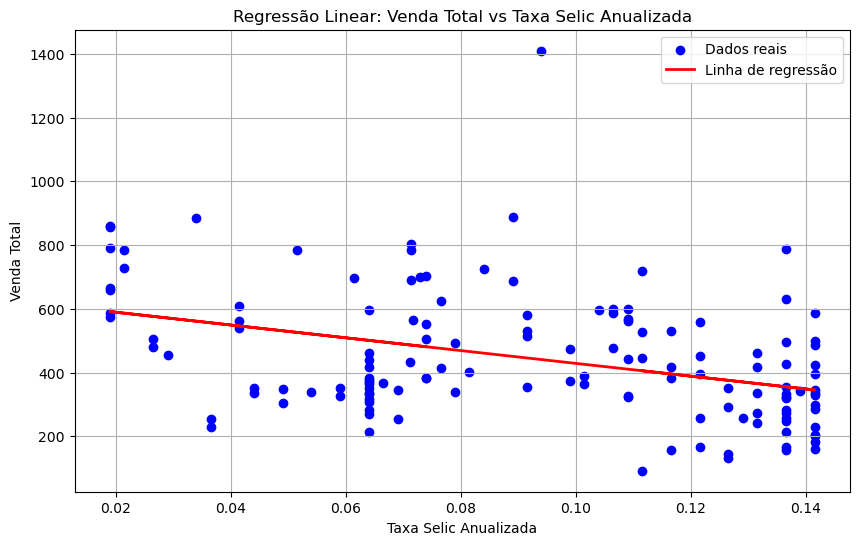

(0.1525774362155059, 2.1747754391069573e-06)

In [50]:
# Plotar o gráfico de dispersão com a linha de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Dados reais')
plt.plot(X, Y_pred, color='red', linewidth=2, label='Linha de regressão')
plt.title('Regressão Linear: Venda Total vs Taxa Selic Anualizada')
plt.xlabel('Taxa Selic Anualizada')
plt.ylabel('Venda Total')
plt.legend()
plt.grid()
plt.show()

# Exibir os resultados
r2, p_values

## Conclusão

##### Apesar do baixo valor de R² (15,25%), o P-Value extremamente baixo indica que é improvável não existir uma relação negativa estatisticamente significativa entre a Taxa Selic e a venda total de imóveis na RMR. Esse resultado está em conformidade com a teoria econômica, pois a Taxa Selic influencia diretamente o custo do crédito imobiliário.

##### A análise sugere que aumentos na Taxa Selic tendem a reduzir as vendas de imóveis, mas outros fatores não capturados pelo modelo podem explicar a variabilidade restante (soma dos quadrados dos resíduos), Assim, para aprimorar o modelo, seria interessante incluir parâmetros regionais relevantes, como:
- Taxa de desemprego
- Índice SINAPI (custo médio da construção civil por m²)
- Renda média da população

##### Além disso, recomenda-se decompor a série temporal para identificar sazonalidade, tendências e ciclos. Também seria relevante investigar se há algum lag (atraso) entre as variações na Taxa Selic e o impacto efetivo na demanda por imóveis.